In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [8]:
# Parameters
N = 100  # Number of spins
h = 0.0  # Fixed external magnetic field
T = 1.0  # Temperature
steps = 10000  # Number of Monte Carlo steps
mu_values = np.linspace(-2, 2, 21)  # Mean values of J
sigma = 1.0  # Standard deviation of J

In [9]:
# Function to calculate the energy of the system
def calculate_energy(spins, J, h):
    energy = -np.sum(J * spins[:-1] * spins[1:])  # Nearest neighbor interaction with disordered J
    energy -= h * np.sum(spins)  # External magnetic field contribution
    return energy

In [10]:
# Monte Carlo simulation using the Metropolis algorithm
def metropolis(spins, J, h, T, steps):
    for _ in range(steps):
        # Randomly select a spin to flip
        i = np.random.randint(0, N)
        proposed_spins = spins.copy()
        proposed_spins[i] *= -1  # Flip the spin

        # Calculate the change in energy
        delta_E = calculate_energy(proposed_spins, J, h) - calculate_energy(spins, J, h)

        # Accept or reject the flip based on the Metropolis criterion
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            spins = proposed_spins

    return spins

In [11]:
# Initialize arrays to store results
initial_spins_list = []
final_spins_list = []
magnetizations = []

# Loop over different mean values of J
for mu in mu_values:
    # Generate disordered J from a normal distribution
    J = np.random.normal(mu, sigma, N - 1)  # N-1 interactions for N spins

    # Initialize spin configuration randomly
    spins = np.random.choice([-1, 1], size=N)
    initial_spins_list.append(spins.copy())  # Save initial spins

    # Run the simulation
    final_spins = metropolis(spins, J, h, T, steps)
    final_spins_list.append(final_spins.copy())  # Save final spins
    # Calculate the magnetization (average spin)
    magnetization = np.mean(final_spins)
    magnetizations.append(magnetization)


/var/folders/dn/t1jyr93n2pz9t132yhd9jdmm0000gn/T/ipykernel_35191/3739825425.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


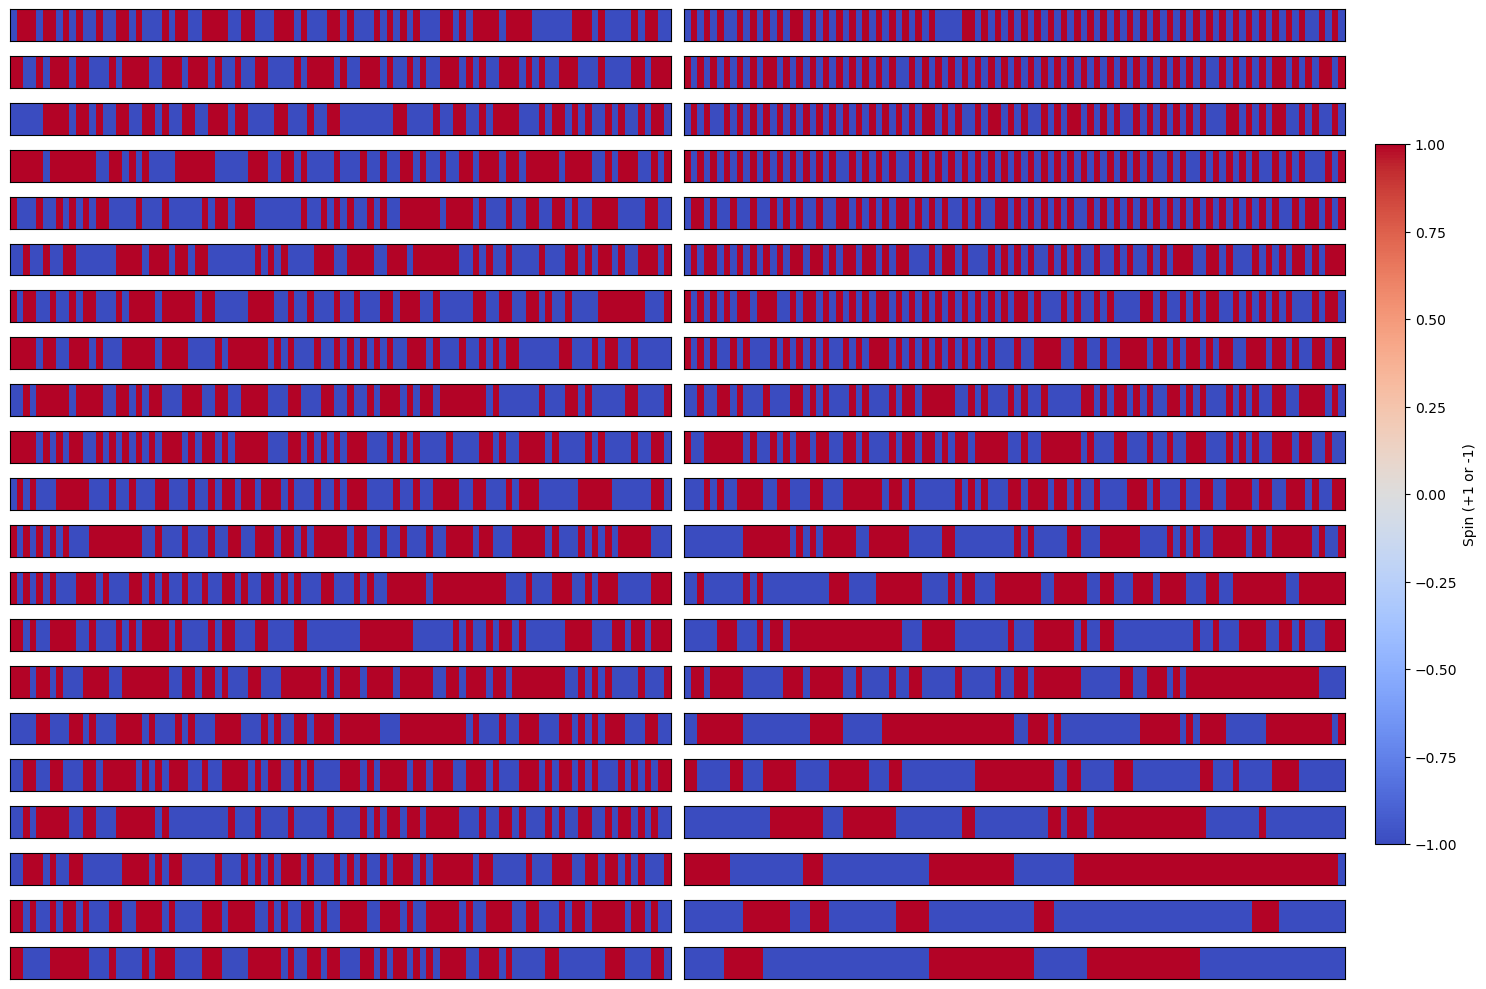

In [12]:
# Create a figure with GridSpec for better layout control
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(len(mu_values), 2, figure=fig, width_ratios=[1, 1], height_ratios=[1] * len(mu_values))

# Plot initial and final spins for each mu
for i, mu in enumerate(mu_values):
    # Plot initial spins
    ax1 = fig.add_subplot(gs[i, 0])
    im1 = ax1.imshow([initial_spins_list[i]], cmap="coolwarm", aspect="auto", vmin=-1, vmax=1)
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot final spins
    ax2 = fig.add_subplot(gs[i, 1])
    im2 = ax2.imshow([final_spins_list[i]], cmap="coolwarm", aspect="auto", vmin=-1, vmax=1)
    ax2.set_xticks([])
    ax2.set_yticks([])

# Add a single colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of the colorbar
fig.colorbar(im1, cax=cbar_ax, label="Spin (+1 or -1)")

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Make space for the colorbar
plt.show()

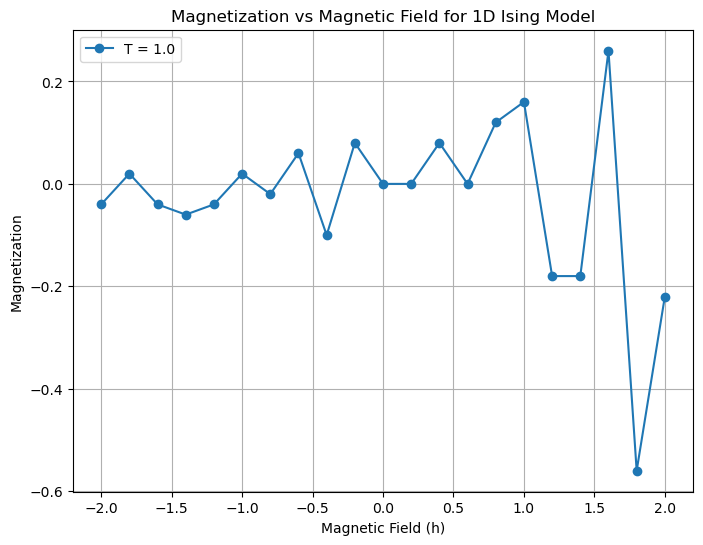

In [14]:
# Plot magnetization vs magnetic field
plt.figure(figsize=(8, 6))
plt.plot(mu_values, magnetizations, 'o-', label=f"T = {T}")
plt.xlabel("Magnetic Field (h)")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Magnetic Field for 1D Ising Model")
plt.grid()
plt.legend()
plt.show()